# Logistic Regression (with regularazation)

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
data = pd.read_csv('ex2data2.txt', names = ['Test1', 'Test2', 'Accepted'])
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


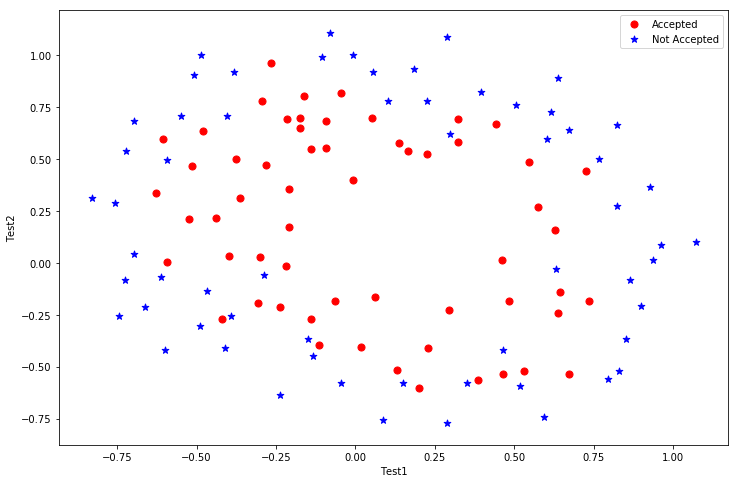

In [130]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['Test1'], positive['Test2'],  s=50, c='r', marker='o', label='Accepted')
ax.scatter(negative['Test1'], negative['Test2'],  s=50, c='b', marker='*', label='Not Accepted')
ax.legend()
ax.set_xlabel('Test1')
ax.set_ylabel('Test2')
plt.show()

In [131]:
degree = 5
x1 = data['Test1']
x2 = data['Test2']

data.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data.drop('Test1', axis=1, inplace=True)
data.drop('Test2', axis=1, inplace=True)

data.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


## regularized cost
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [132]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [133]:
def reg_cost(theta, X, y, lamda):
    theta = np.matrix(theta) # there is problem without this line
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(y)
    hx = X * theta.T
    first = np.multiply(-y, np.log(sigmoid(hx)))
    second = np.multiply((1-y), np.log(1 - sigmoid(hx)))
    reg = (lamda / (2 * m)) * np.sum(np.multiply(theta, theta))
    cost = np.sum(first - second) / m + reg
    return cost

In [134]:
theta = np.zeros(11)
X = data.iloc[:, 1:12]
y = data.iloc[:, 0:1]
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(theta)
lamda = 1

## gradient descent 
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

In [135]:
def reg_gradient(theta, X, y, lamda):
    m = len(y)
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    temp = (1 / m) * (sigmoid(X * theta.T) - y).T * X
    theta[0, 0] = 0
    reg = (lamda / m) * theta
    grad = np.matrix(temp + reg)
    return grad

In [136]:
regCost = reg_cost(theta, X, y, lamda)
regcost1 = costReg(theta, X, y, lamda)
grad = reg_gradient(theta, X, y, lamda)
regCost, regcost1

(0.6931471805599454, 0.6931471805599454)

In [137]:
import scipy.optimize as opt
result = opt.fmin_tnc(func = reg_cost, x0 = theta, fprime = reg_gradient, args = (X, y, lamda))
result

(array([ 0.53010248,  0.29075567, -1.60725764, -0.58213819,  0.01781027,
        -0.21329508, -0.40024142, -1.37144139,  0.02264304, -0.9503358 ,
         0.0344085 ]), 22, 0)

In [168]:
def predict(theta, X):
    prediction = []
    theta = np.matrix(theta)
    temp = sigmoid (X * theta.T)
    print(temp)
    for i in temp:
        if i >= 0.5:
            prediction.append(1)
        else:
            prediction.append(0) 
    print(prediction)
    return prediction

In [172]:
prediction = predict(result[0], X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(prediction, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

[[0.6245366 ]
 [0.6312217 ]
 [0.61975298]
 [0.56548889]
 [0.4899806 ]
 [0.46928183]
 [0.53268695]
 [0.56200749]
 [0.6311823 ]
 [0.63703814]
 [0.60383183]
 [0.54638477]
 [0.47701848]
 [0.38843735]
 [0.4470476 ]
 [0.56126082]
 [0.6110124 ]
 [0.63298018]
 [0.62574736]
 [0.51949427]
 [0.42441774]
 [0.39455216]
 [0.40553736]
 [0.50561922]
 [0.61172245]
 [0.63470445]
 [0.57624136]
 [0.44374333]
 [0.62489739]
 [0.60589094]
 [0.62118456]
 [0.63034316]
 [0.62405252]
 [0.59555188]
 [0.56112974]
 [0.57216219]
 [0.58460903]
 [0.62221204]
 [0.63351426]
 [0.63259528]
 [0.62247624]
 [0.56681473]
 [0.46735884]
 [0.56457024]
 [0.44671943]
 [0.46796001]
 [0.29658311]
 [0.59888234]
 [0.48345806]
 [0.54812059]
 [0.61479889]
 [0.62949536]
 [0.62863606]
 [0.60877541]
 [0.6029996 ]
 [0.5217998 ]
 [0.59472757]
 [0.6083015 ]
 [0.58284073]
 [0.57968105]
 [0.56653385]
 [0.41724019]
 [0.32656049]
 [0.37304431]
 [0.24081574]
 [0.12023844]
 [0.23485474]
 [0.12965054]
 [0.15843145]
 [0.24565916]
 [0.21547956]
 [0.26